In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,GlobalAveragePooling2D,Flatten
from keras import layers,models
from keras.models import Sequential,Model
from keras.applications.inception_v3 import InceptionV3
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
import split_folders

In [3]:
split_folders.ratio('dataset\Train', output="output", seed=1337, ratio=(.8, .2))

Copying files: 0 files [00:00, ? files/s]

Copying files: 2042 files [00:03, 666.96 files/s]


In [4]:
train_path = "output/train"
test_path = "output/val"

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.09)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(300,300), batch_size=32, class_mode='binary',subset='training')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(300,300), batch_size=32, class_mode='binary')
val_generator = train_datagen.flow_from_directory(train_path, target_size=(300,300), batch_size=32, class_mode='binary', subset='validation')

Found 1485 images belonging to 2 classes.
Found 410 images belonging to 2 classes.
Found 146 images belonging to 2 classes.


In [7]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

In [8]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

In [117]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam',
               metrics = ['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
47/47 [==============================] - 67s 1s/step - loss: 0.4162 - accuracy: 0.8047 - val_loss: 0.9052 - val_accuracy: 0.5616
Epoch 2/20
47/47 [==============================] - 62s 1s/step - loss: 0.3813 - accuracy: 0.8323 - val_loss: 0.8397 - val_accuracy: 0.6096
Epoch 3/20
47/47 [==============================] - 61s 1s/step - loss: 0.3807 - accuracy: 0.8276 - val_loss: 0.8569 - val_accuracy: 0.5890
Epoch 4/20
47/47 [==============================] - 59s 1s/step - loss: 0.3796 - accuracy: 0.8249 - val_loss: 0.8962 - val_accuracy: 0.5890
Epoch 5/20
47/47 [==============================] - 60s 1s/step - loss: 0.3804 - accuracy: 0.8249 - val_loss: 1.0059 - val_accuracy: 0.5137
Epoch 6/20
47/47 [==============================] - 60s 1s/step - loss: 0.3635 - accuracy: 0.8303 - val_loss: 0.9324 - val_accuracy: 0.5890
Epoch 7/20
47/47 [==============================] - 61s 1s/step - loss: 0.3678 - accuracy: 0.8290 - val_loss: 0.9007 - val_accuracy: 0.5685
Epoch 8/20
47/47 [==

In [120]:
model.save('intrusion.h5')

In [118]:
loss, accuracy = model.evaluate(test_generator)

13/13 [==============================] - 12s 933ms/step - loss: 1.0888 - accuracy: 0.5854


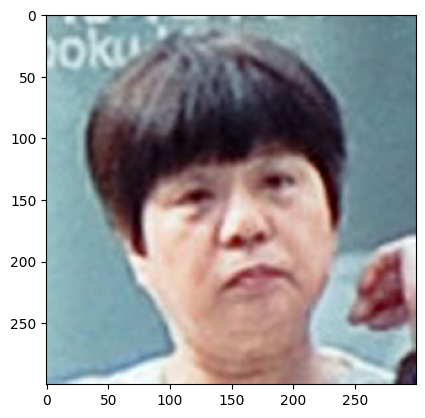

In [123]:
img_path = 'output/test\Real/real_00451.jpg'
img = image.load_img(img_path, target_size=(300, 300))
plt.imshow(img)
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)


In [124]:
prediction = model.predict(x)
print("Fake" if prediction < 0.5 else "Real" )
print(prediction[0],1-prediction[0])
print("The probability is {}%".format(int(100 - prediction[0]*100) if prediction[0] < 0.5 else prediction[0]))

1/1 [==============================] - 0s 69ms/step
Real
[0.99327046] [0.00672954]
The probability is [0.99327046]%
